In [1]:
using Plots
using AdvConvex.HW3
using AdvConvex.HW4
using Optim

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling AdvConvex [a70558b1-94d0-46ca-a15d-76cbf33c1d08]
[ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]


In [2]:
mat = get_spam_data()
X_train, Y_train, X_test, Y_test = train_test_split(mat, 0.05)

([-2.3025850929940455 -1.7147984280919266 … -2.3025850929940455 -2.3025850929940455; -2.3025850929940455 -2.3025850929940455 … -2.3025850929940455 -2.3025850929940455; … ; 2.4932054526026954 3.7864597824528 … 2.7788192719904172 2.4932054526026954; 4.883559211528279 6.499937405290376 … 4.11251186617755 4.160444363926624], [1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0  …  -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0], [-2.3025850929940455 -2.3025850929940455 … -0.030459207484708574 -1.3862943611198906; -2.3025850929940455 -2.3025850929940455 … -1.3093333199837622 -1.6094379124341003; … ; 2.4069451083182885 1.9600947840472698 … 4.763028270603671 3.893859034800475; 3.7864597824528 2.7788192719904172 … 8.159975242934362 6.933520486868163], [1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0  …  -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0])

In [4]:
f = LogRegProblem(X_test,Y_test)
∇f(w) = HW3.∇(f, w)

prob = DifferentiableProblem(f, ∇f)
nest_solver = NesterovDescentSolver(
    α = 1e-2,
    ϵ = 0.0,
    max_iter = 10^4,
    linesearch = BackTrackingLineSearch(),
)

w_opt_nest, hist_nest = HW4.solve(nest_solver, prob, zeros(size(X_test, 1)));

In [5]:
gd_solver = GradientDescentSolver(
    α = 1e-3,
    ϵ = 1e-10,
    max_iter = 10^4,
    linesearch = BackTrackingLineSearch(),
)
w_opt_gd, hist_gd = HW3.solve(gd_solver, prob, zeros(size(X_test, 1)));

In [6]:
res = optimize(f, zeros(size(X_test, 1)), NelderMead(),
    Optim.Options(iterations=10_000, show_trace=false, store_trace=true)
)

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     4.497449e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    10000
    f(x) calls:    13724


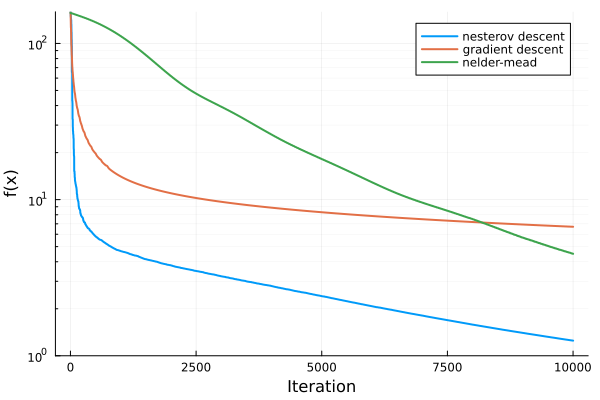

In [7]:
plot(
    hist_nest.f, yscale=:log10,
    label="nesterov descent", lw=2,
    xlabel="Iteration", ylabel="f(x)",
    ylims=(10^(floor(log10(last(hist_nest.f)))),Inf), yminorgrid=true)
plot!(hist_gd.f, label="gradient descent", lw=2)
plot!(getfield.(res.trace, :value), label="nelder-mead", lw=2)